In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, fontManager

# List of places (cities) you want to visualize
places = [
    "San Francisco, California, USA",
    "Menlo Park, California. USA"
    "Palo Alto, California, USA",
    "Mountain View, California, USA",
    "Cupertino, California, USA",
    "Santa Clara, California, USA",
    "San Jose, California, USA",
    "Berkeley, California, USA",
    "Sausalito, California, USA",
    "Carmel-by-the-Sea, California, USA",
    "Monterey, California, USA"
]

# Define color palette pairs
color_palette_actual = [
    ('#A2A2A1FF', '#195190FF'),  
    ('#B1624EFF', '#5CC8D7FF'),  
    ('#EA738DFF', '#CBCE91FF') 
]

# Extend with additional colors if necessary
additional_colors = [
     
    ('#95f9c3', '#0b3866'),  
    ('#613232', '#ffc8c8'),  
    ('#f4f1de', '#e07a5f'),  
    ('#6ff7e8', '#1f7ea1'),
    ('#45caff', '#ff1b6b'),  
    ('#f8acff', '#696eff'),  
    ('#9bafd9', '#103783'),   
    ('#00f59b', '#7014f2'),  
    ('#07f49e', '#42047e'),  
    ('#ff0f7b', '#f89b29'),  
    ('#60efff', '#0061ff'),
    ('#faf0ca', '#0d3b66')   
]

AttributeError: 'wrapper_descriptor' object has no attribute '__annotate__'

 osmnx supports several different types of network configurations, not just for driving. Here are the available options for the network_type parameter:

all: All types of ways.
all_private: All types of ways, including private-access roads.
bike: Bike-friendly roads and paths.
drive: Roads for motor vehicles, typically excluding service roads.
drive_service: Roads for motor vehicles, including service roads.
walk: Pedestrian paths and walkways.

Available fonts:  ['.Aqua Kana', '.Keyboard', '.New York', '.New York', '.SF Arabic', '.SF Arabic Rounded', '.SF Armenian', '.SF Armenian Rounded', '.SF Camera', '.SF Compact', '.SF Compact', '.SF Compact Rounded', '.SF Georgian', '.SF Georgian Rounded', '.SF Hebrew', '.SF Hebrew Rounded', '.SF NS Mono', '.SF NS Mono', '.SF NS Rounded', '.SF Soft Numeric', '.ThonburiUI', 'Abolition', 'Academy Engraved LET', 'Al Bayan', 'Al Nile', 'Al Tarikh', 'Alegreya', 'Alegreya', 'Alegreya', 'American Typewriter', 'Andale Mono', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Braille', 'Apple Chancery', 'Apple SD Gothic Neo', 'Apple Symbols', 'AppleGothic', 'AppleMyungjo', 'Arial', 'Arial', 'Arial', 'Arial', 'Arial Black', 'Arial Hebrew', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Narrow', 'Arial Rounded MT Bold', 'Arial Unicode MS', 'Arial Unicode MS', 'Athelas', 'Avenir', 'Avenir Next', 'Avenir Next Condensed', 'Ayuthaya', 'Baghdad', 'Bangla MN', 'Bangla Sang

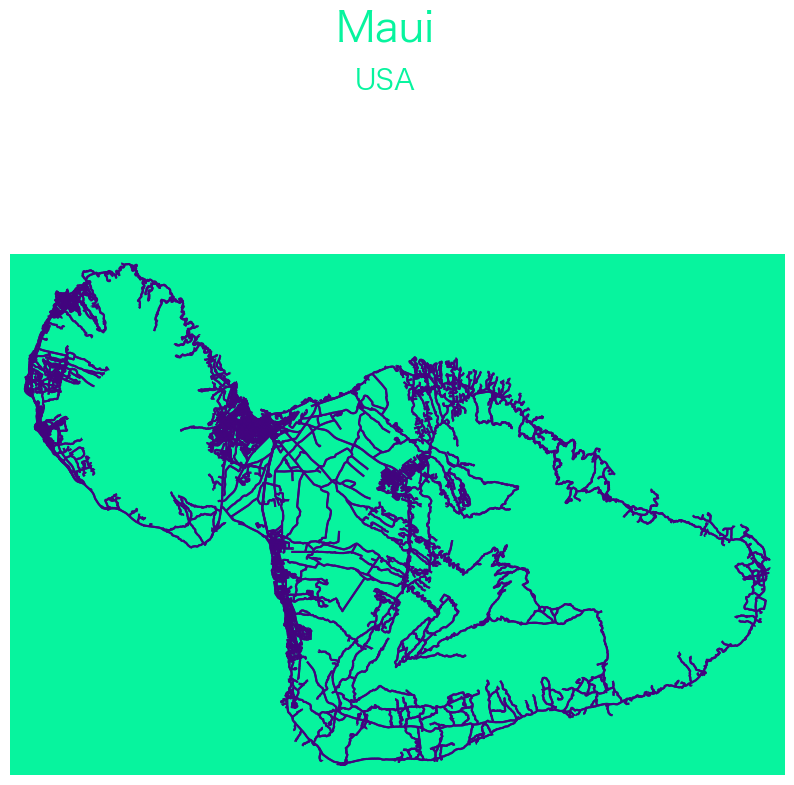

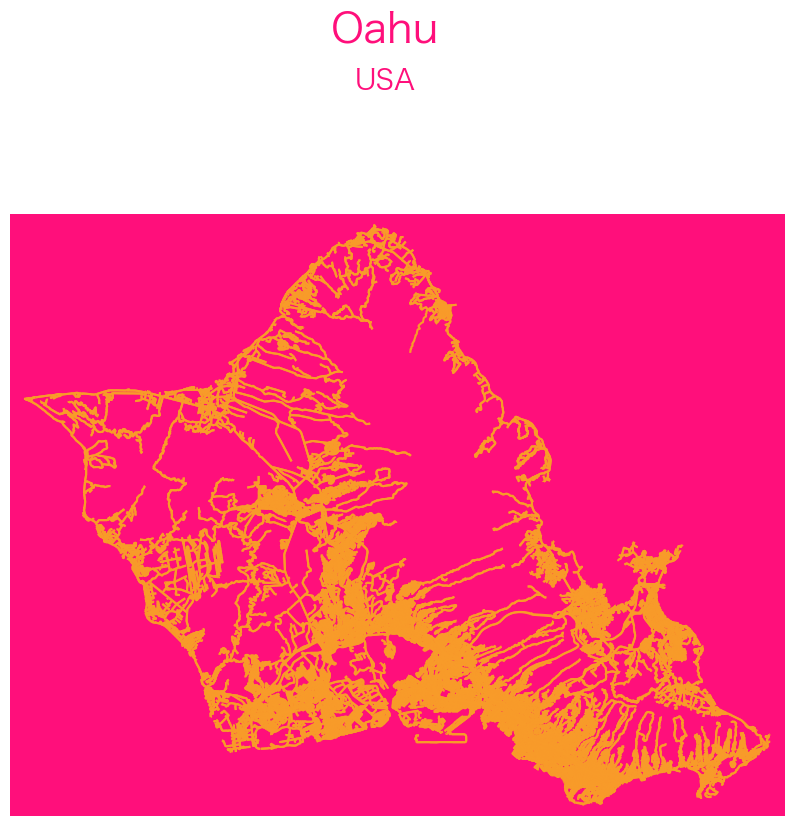

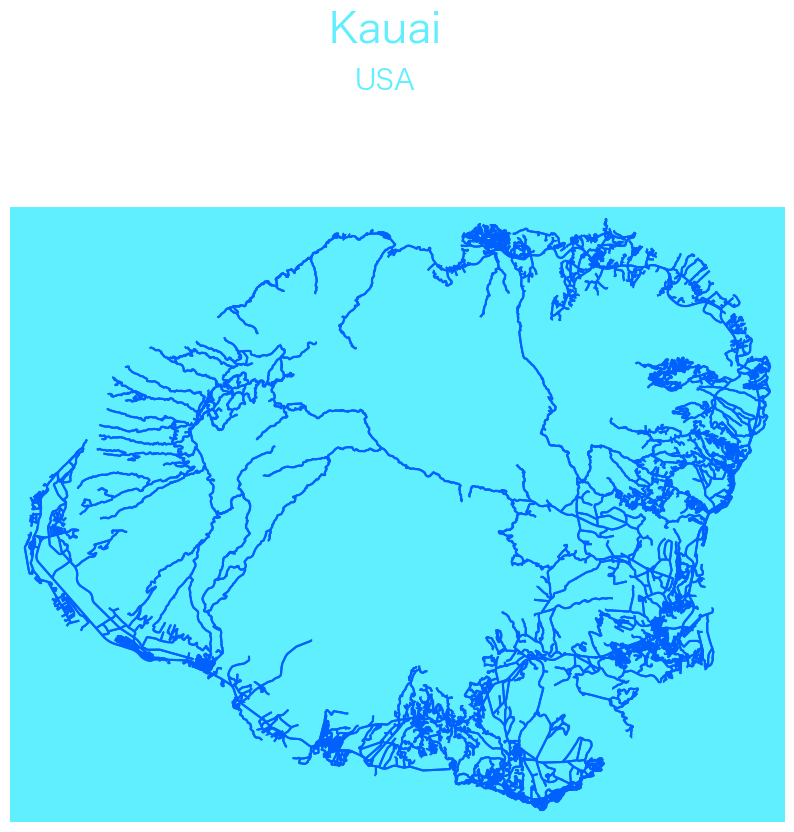

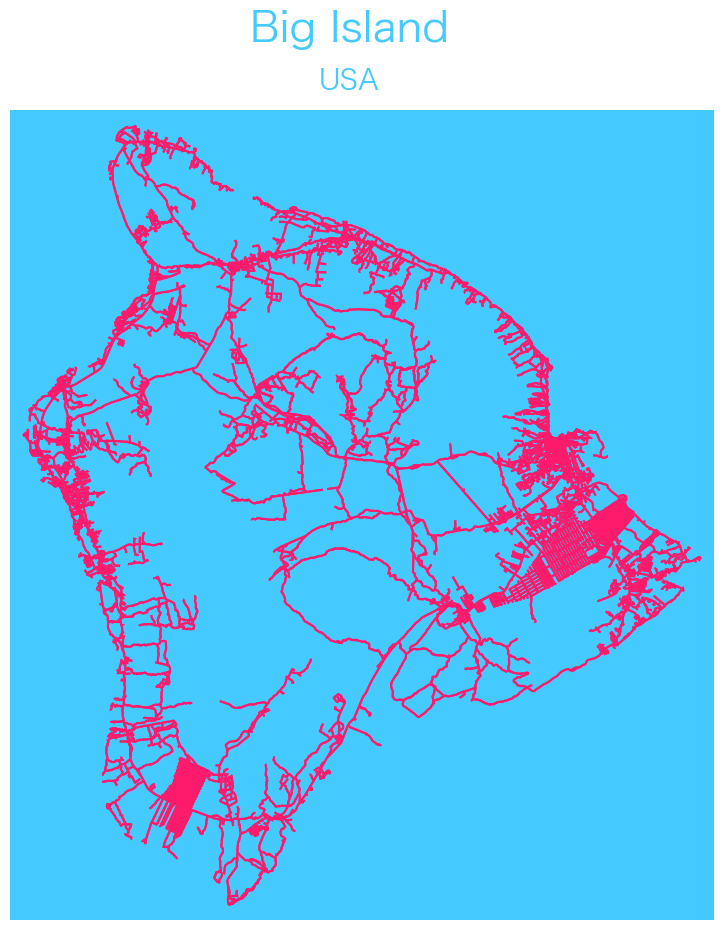

In [5]:
# Combine the colors to make 12 pairs
color_palette_actual.extend(additional_colors[:9])

# Check available fonts
available_fonts = sorted([f.name for f in fontManager.ttflist])
print("Available fonts: ", available_fonts)

# Set the font properties (use a different font if Nanum Gothic is not available)
font_properties_city = FontProperties(family='.aqua kana', size=30)  # Font for city name
font_properties_country = FontProperties(family='.aqua kana', size=20)  # Font for country name

for i, place_name in enumerate(places):
    # Split the place name into city and country
    city, state, country = place_name.split(', ')
    title_text = f"{city}\n{country}"

    # Download the street network data
    graph = ox.graph_from_place(place_name, network_type='all')

    # Select a color pair (cycling through the list)
    background_color, edge_color = color_palette_actual[i % len(color_palette_actual)]

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.subplots_adjust(top=0.92)  # Adjust to create space at the top

    # Plot the street network on the axis with the background color
    ax.set_facecolor(background_color)
    ox.plot_graph(graph, ax=ax, node_size=0, edge_color=edge_color, edge_linewidth=1.5, show=False, close=False)

    # Add the city and country name above the visualization
    fig.suptitle(city, fontsize=30, fontproperties=font_properties_city, color=background_color, ha='center', y=1.02)
    fig.text(0.5, 0.94, country, fontsize=20, fontproperties=font_properties_country, color=background_color, ha='center')

    # Save the plot to a file
    filename = f'urban_network_{place_name.replace(", ", "_").replace(" ", "_")}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()
